In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 8. Load the Titanic dataset and perform univariate and bivariate analysis on numerical and categorical features.

In [3]:
data = sns.load_dataset('titanic')

In [144]:
data.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

## univariate

In [17]:
numarical_col = list(data.describe().columns)
numarical_col

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [31]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
univariate = data[numarical_col].mean()
univariate

survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
parch        0.381594
fare        32.204208
dtype: float64

## bivariate

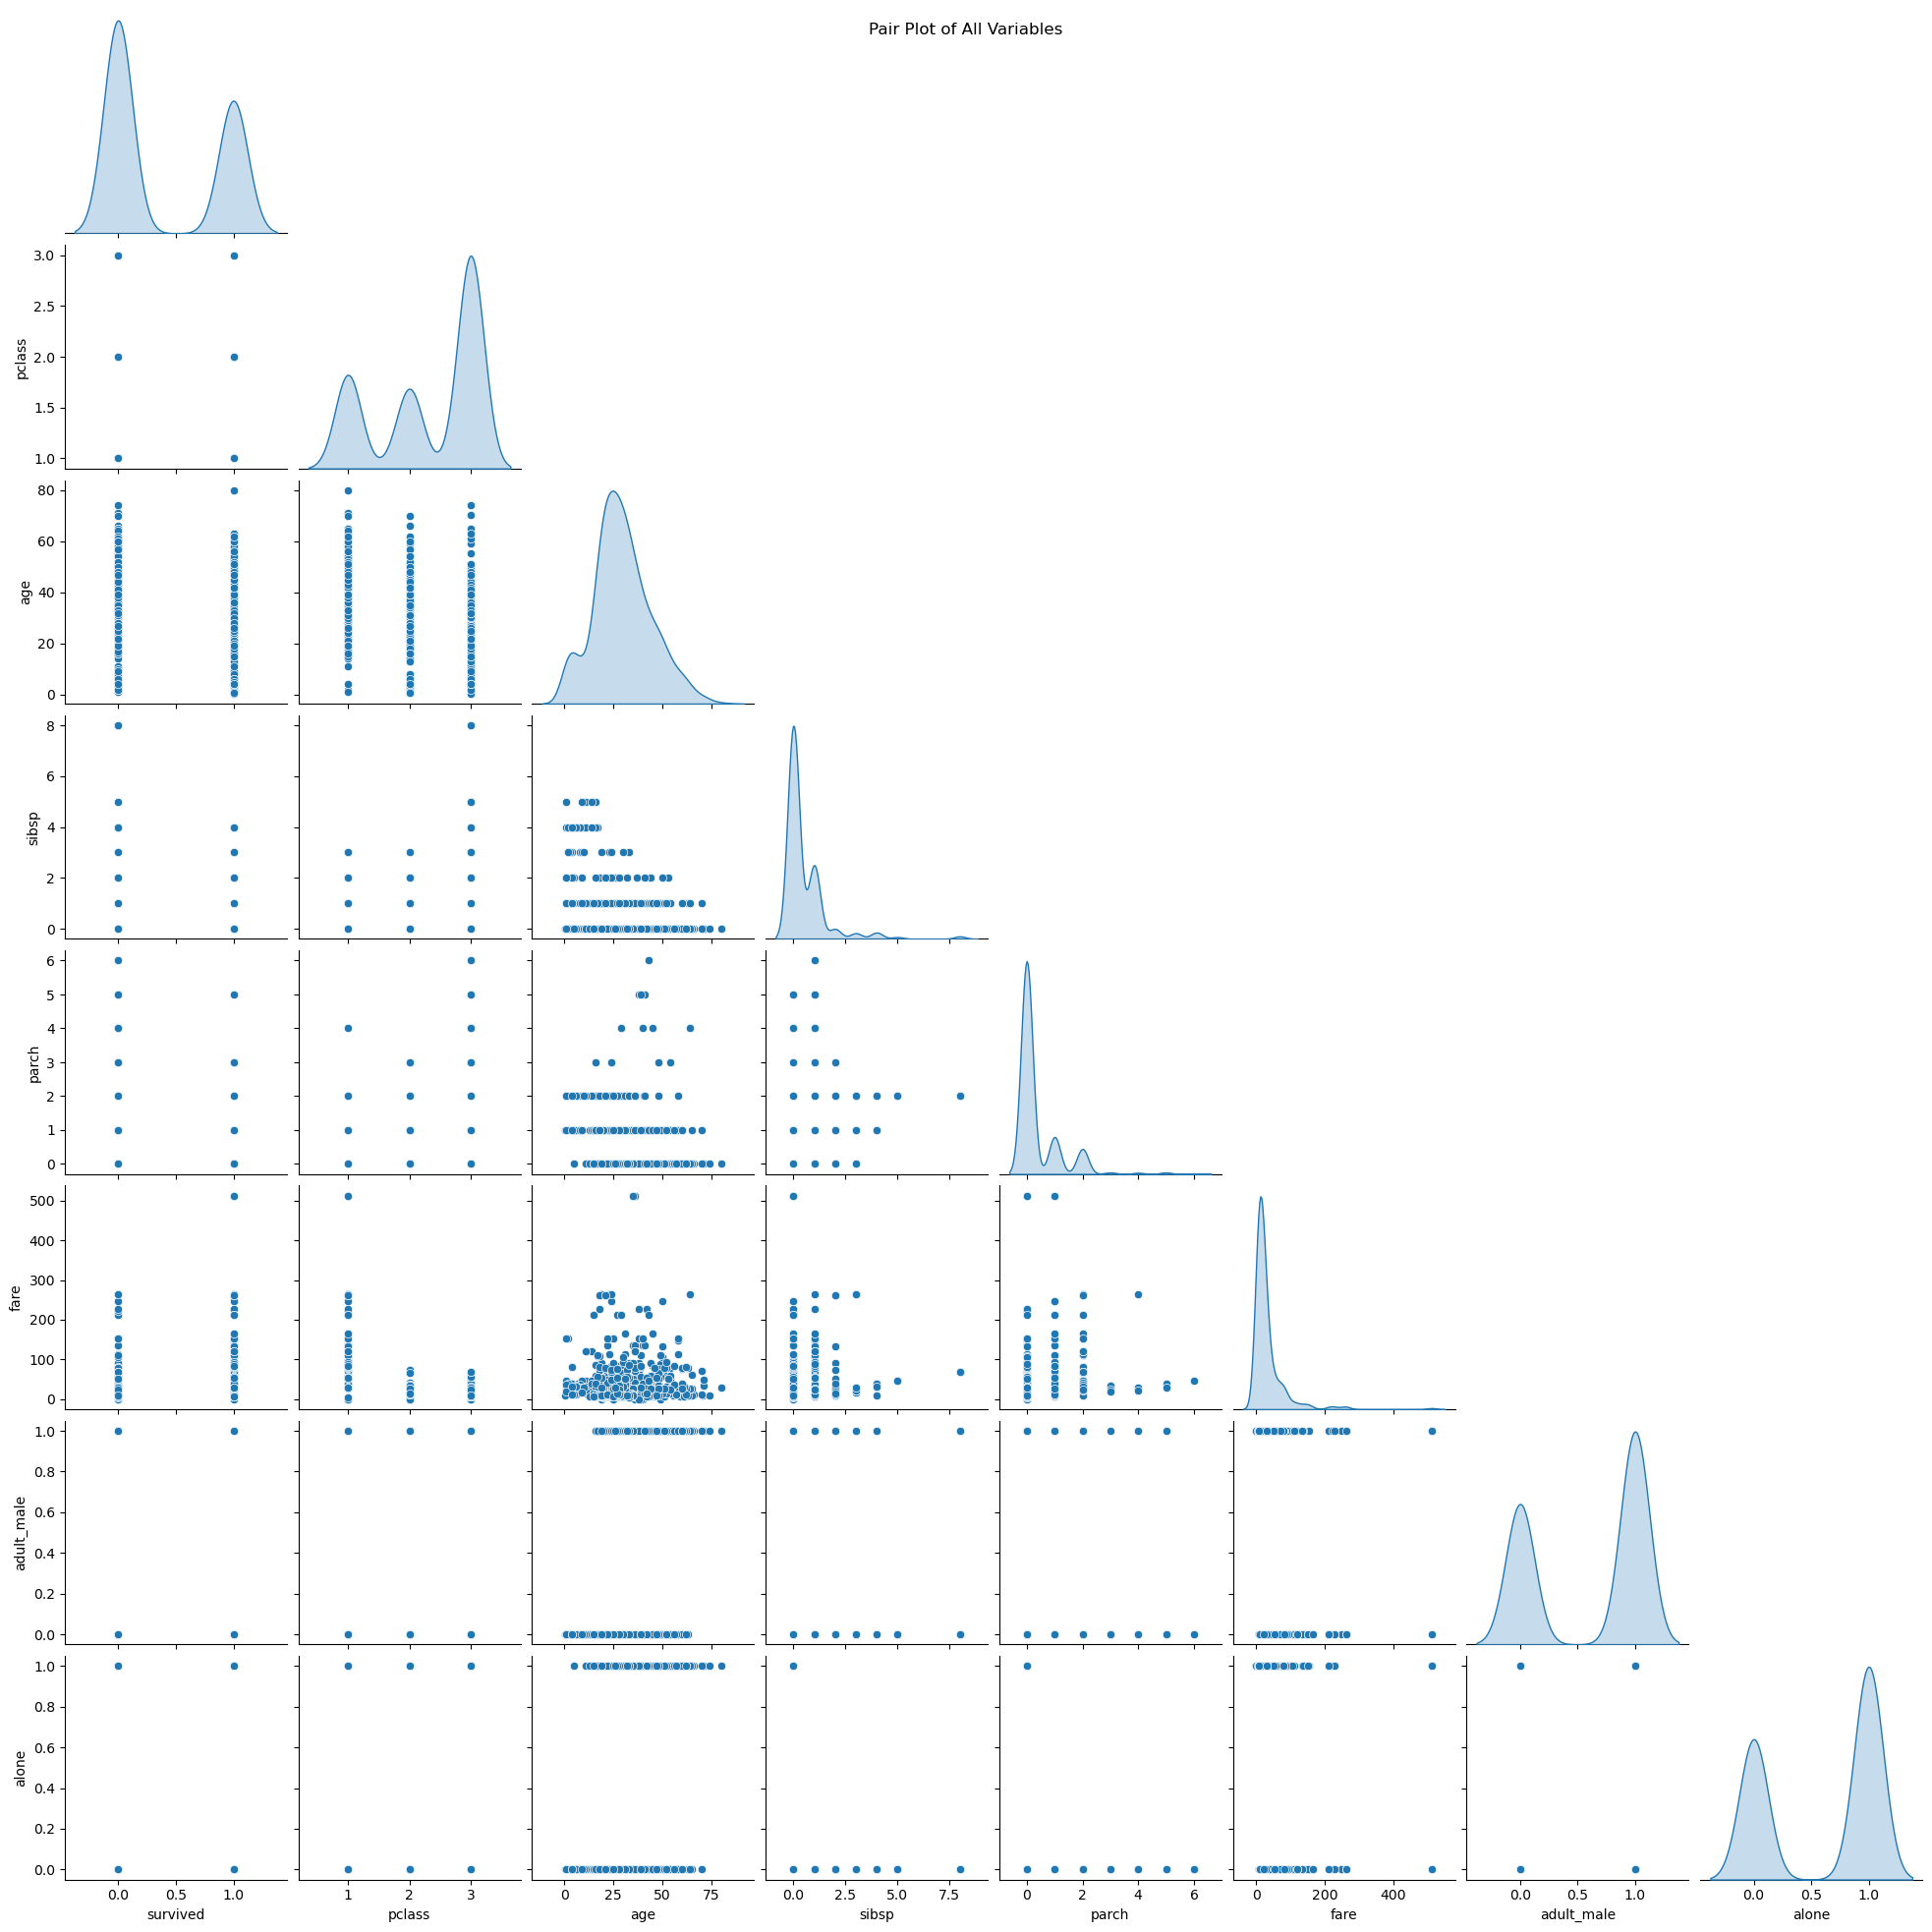

In [33]:
sns.pairplot(data, diag_kind='kde', markers='o', corner=True)
plt.suptitle("Pair Plot of All Variables")
plt.show()



<Axes: >

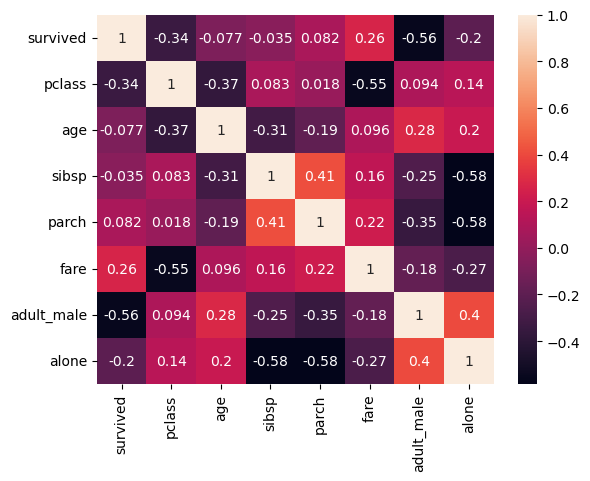

In [37]:
# sns.heatmap(data,numarical_only=True)
sns.heatmap(data.corr(numeric_only=True),annot=True)

Text(0.5, 1.0, 'avg rating of actionby Platform')

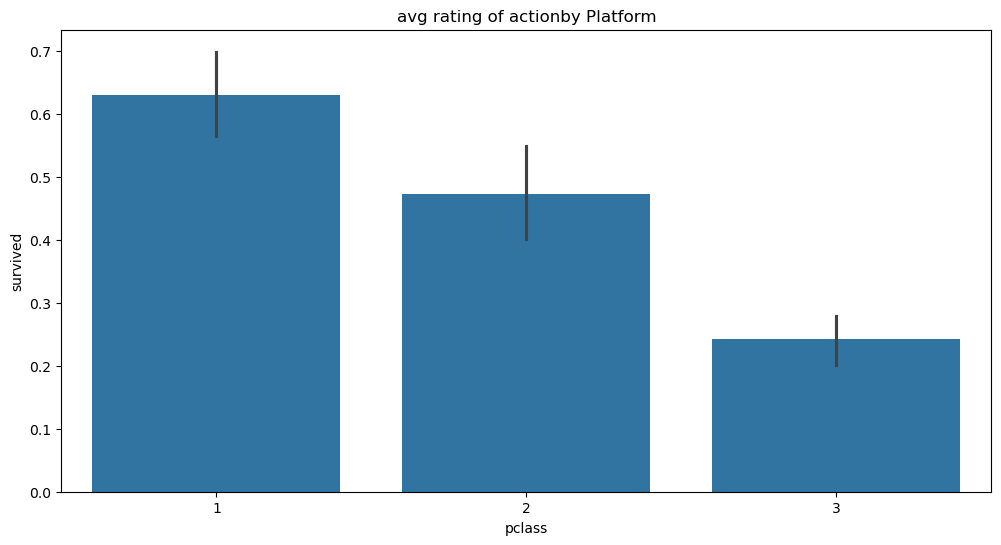

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(x=data['pclass'],y=data['survived'])
plt.title("avg rating of actionby Platform")


Text(0.5, 1.0, 'avg rating of actionby Platform')

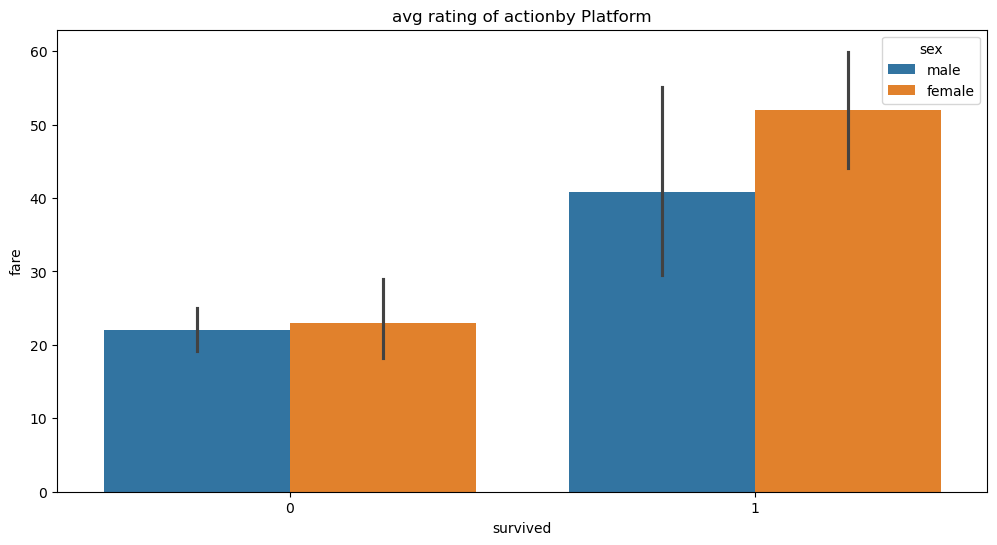

In [59]:
plt.figure(figsize=(12,6))
sns.barplot(y=data['fare'],x=data['survived'],hue=data['sex'])
plt.title("avg rating of actionby Platform")

In [39]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Text(0.5, 1.0, 'avg rating of actionby Platform')

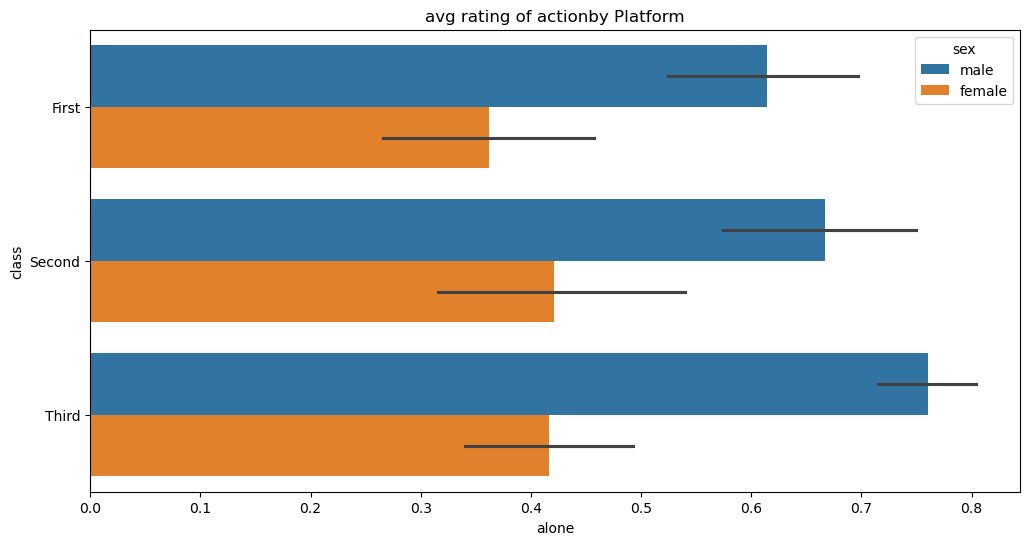

In [70]:
plt.figure(figsize=(12,6))
sns.barplot(y=data['class'],x=data['alone'],hue=data['sex'])
plt.title("avg rating of actionby Platform")

<Axes: xlabel='alive', ylabel='Count'>

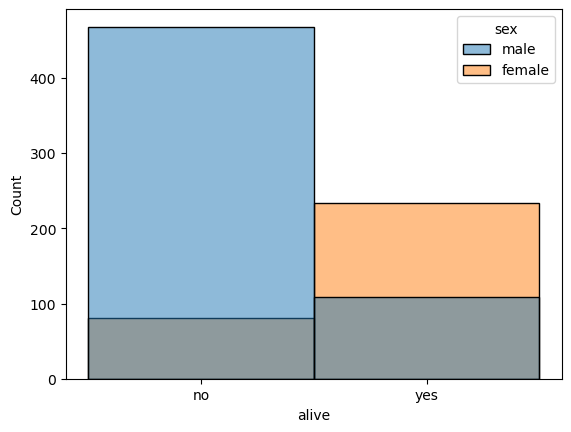

In [73]:
sns.histplot(data=data,x='alive',hue='sex')

<Axes: xlabel='survived', ylabel='Count'>

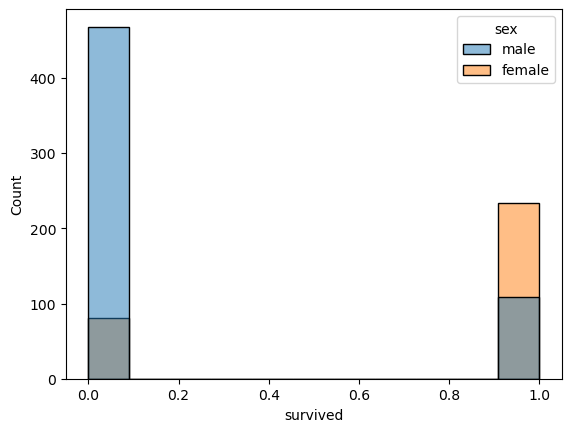

In [78]:
sns.histplot(data=data,x='survived',hue='sex')

In [ ]:
ex(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone']

In [98]:
data.groupby('class')['alone'].count()

C:\Users\user\AppData\Local\Temp\ipykernel_28688\1169470333.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('class')['alone'].count()


class
First     216
Second    184
Third     491
Name: alone, dtype: int64

### 9. Identify and visualize outliers using boxplots and z-score analysis.

8.0 16.0


[10, 12, 11, 13, 12, 11, 13]

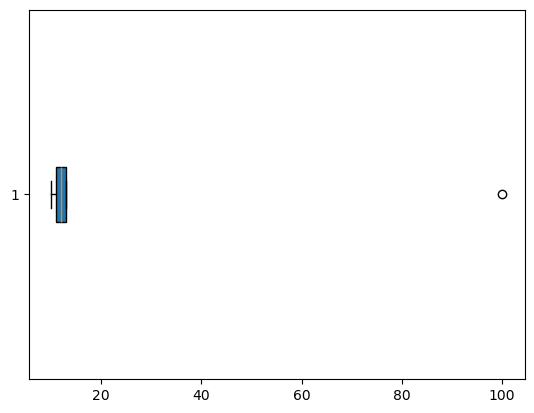

In [116]:

# Using Z-Score detect Outlier 
Sample_data = [10,12,11,13,100,12,11,13]
plt.boxplot(Sample_data, vert=False, patch_artist=True)
q1 = np.percentile(Sample_data,25)
q3 = np.percentile(Sample_data,75)
IQR = q3-q1
lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR
print(lower_bound,upper_bound)

Sample_data=[x for x in Sample_data if x>=lower_bound and x<=upper_bound]
Sample_data


{'whiskers': [<matplotlib.lines.Line2D at 0x25cffe0ed50>,
 'caps': [<matplotlib.lines.Line2D at 0x25cffe0efd0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x25cffe0ec10>],
 'medians': [<matplotlib.lines.Line2D at 0x25cffe0f250>],
 'fliers': [<matplotlib.lines.Line2D at 0x25cffe0f390>],
 'means': []}

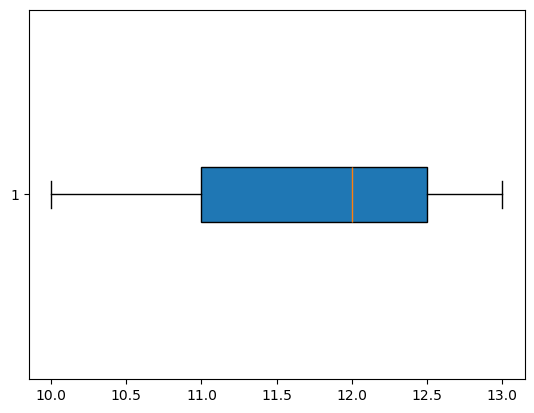

In [117]:
plt.boxplot(Sample_data, vert=False, patch_artist=True)

In [140]:
percentage = data.groupby('pclass')['alive'].count()
percentage
# data[data['class']=='First']

pclass
1    216
2    184
3    491
Name: alive, dtype: int64

### 10. Display the correlation matrix and visually interpret relationships using seaborn.heatmap().


In [150]:
sample=sns.load_dataset('iris')

corr_data = sample[sample.describe().columns]
# data[numarical_col])

In [151]:
corr_data.corr() # correlation Matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

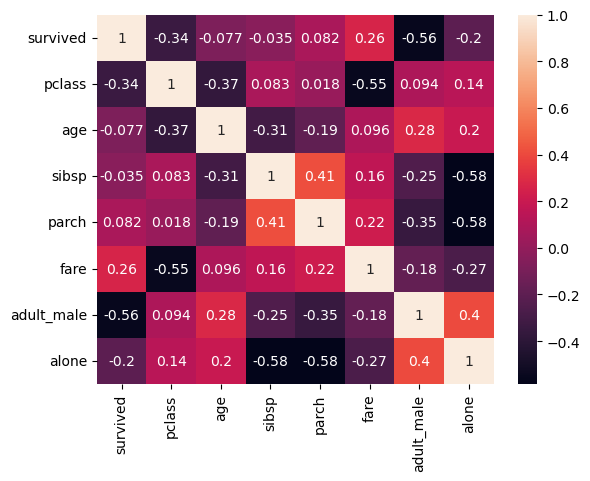

In [146]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

### 11. Compute and interpret mean, median, mode, variance, and standard deviation for a given dataset.

In [152]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [153]:
categorical_data = data.drop(columns=numarical_col)

In [156]:
categorical_data.mode() ## statical analysis on categorical value(mode)

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,C,Southampton,no,True


### 12. Load a dataset with missing values. Demonstrate imputation using mean, median, and mode techniques.

In [173]:
data[numarical_col].fillna(data[numarical_col].mean()).isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [175]:
data[numarical_col].fillna(data[numarical_col].mean())

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [185]:
for col in categorical_data:
    mode_val = data[col].mode()
    data[col] = data[col].fillna(mode_val)

In [186]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck             0
embark_town      0
alive            0
alone            0
dtype: int64

### 13. Write a custom function that removes rows where more than 30% of data is missing.

In [184]:
print(data.isnull().sum())
data_na = ((data.isnull().sum())/len(data))*100

print((data_na))



survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck             0
embark_town      0
alive            0
alone            0
dtype: int64
survived        0.00000
pclass          0.00000
sex             0.00000
age            19.86532
sibsp           0.00000
parch           0.00000
fare            0.00000
embarked        0.00000
class           0.00000
who             0.00000
adult_male      0.00000
deck            0.00000
embark_town     0.00000
alive           0.00000
alone           0.00000
dtype: float64


In [224]:
Sample_Data = {'A':[1,None,3,4], 'B':[None,None,2,None], 'C':[1,2,None,4]}
Sample_Data = pd.DataFrame(Sample_Data)

In [225]:
col=[x for x in Sample_Data.columns if (Sample_Data[x].isnull().sum()/len(Sample_Data[x]))>=0.3]

In [226]:
col
updated_Sample_Data = Sample_Data.copy()

In [227]:
updated_Sample_Data.drop(columns=col,inplace=True)
updated_Sample_Data

,A,C
0,1.0,1.0
1,NaN,2.0
2,3.0,NaN
3,4.0,4.0
